In this second work we consider the possible correlation between SPX, which we estimate as the sum of the stocks we have in our local data, and VIX, which is a measure of volatility of SPX.

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import os

os.chdir('data')

First we get the SPX data by summing all assests in our local data set and again we consider only the close price.
We visually compare SPX and VIX over time and it is not evident that they are correlated.

,SPX,VIX
date,,
2014-02-21,2043.3871,14.68
2014-02-24,2056.1417,14.23
2014-02-25,2051.1438,13.67
2014-02-26,2053.2382,14.35
2014-02-27,2066.4070,14.04


,SPX,VIX
count,1258.000000,1258.000000
mean,2768.968118,14.965890
std,569.045340,4.298676
min,2042.883700,9.140000
25%,2319.402900,12.080000
50%,2491.279400,13.830000
75%,3355.089050,16.629999
max,3918.542500,40.740002


array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

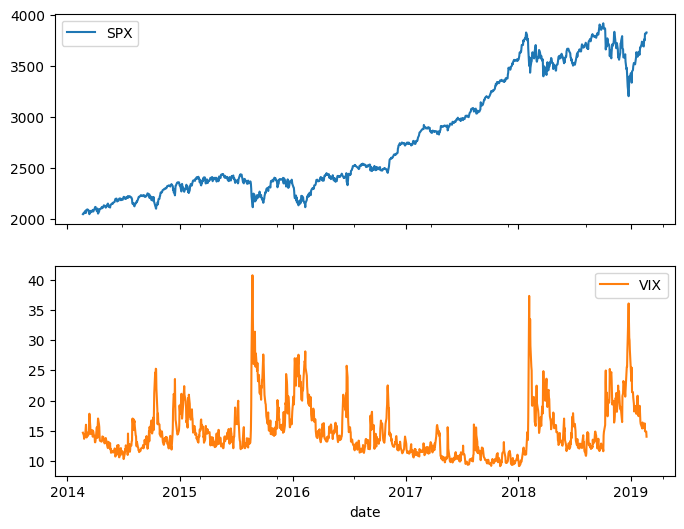

In [2]:
# get SPX (sum of previous data) and VIX volatility
data = pd.DataFrame()

for name in os.listdir('.'):
    if name != 'VIX.csv':
        raw = pd.read_csv(name, index_col=0, parse_dates=True)
        add = pd.DataFrame(raw['close'])
        data = data.add(add, axis=0, fill_value=0)
data.rename({'close':'SPX'},axis=1,inplace=True)

vix = pd.read_csv('VIX.csv', index_col=0, parse_dates=True)
data['VIX'] = vix['Close']

display(data.head())
display(data.describe())

fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(8,6)
data.plot(ax=ax, subplots=True)

Again we are more interested in the log returns of these metrics which appart from agreeing at some peaks do not look obviously correlated.

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

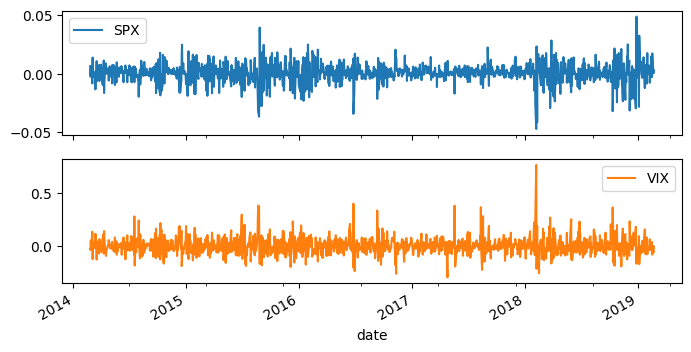

In [3]:
# get log returns
returns = np.log(data / data.shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(8,4))

To consider the correlation we plot a scatter diagram of the two returns and include an OLS regression.
From this see a good indication of negative correlation between the two, ie. when SPX increases then VIX decreases.

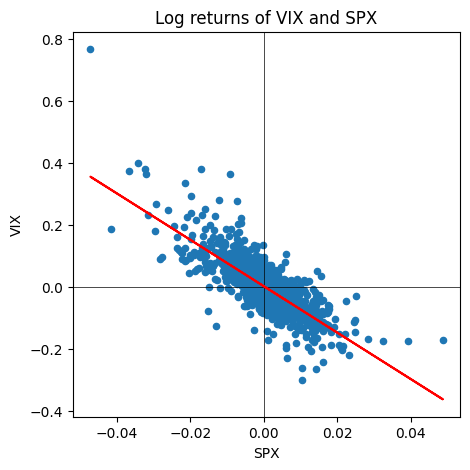

In [4]:
# plotting log returns of SPX and VIX with OLS regression
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
returns.plot(ax=ax,kind='scatter',x='SPX',y='VIX', title='Log returns of VIX and SPX')
ax.axhline(y=0, c='k', lw=0.5)
ax.axvline(x=0, c='k', lw=0.5)

reg = np.polyfit(returns.SPX, returns.VIX, deg=1)
ax.plot(returns.SPX, np.polyval(reg, returns.SPX), c='r')

The negative correlation has a contextual explanation since when markets are good, ie. SPX increases, then traders do not feel the need to trade heavily so the volatility is low.
And in the other direction if markets are down then traders trade more and the volatility increases.
Finally we consider the correlation over time and see that it stays firmly between -0.5 and -0.9, statistically significantly away from zero.

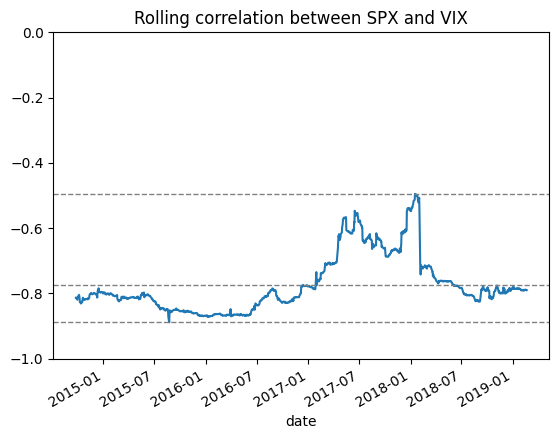

In [5]:
# test correlation
roll_corr = returns.SPX.rolling(window=150).corr(returns.VIX).dropna()
fig, ax = plt.subplots()
roll_corr.plot(ax=ax,title='Rolling correlation between SPX and VIX')
ax.set_ybound(-1,0)
ax.axhline(max(roll_corr),lw=1,c='grey',linestyle='--')
ax.axhline(min(roll_corr),lw=1,c='grey',linestyle='--')
ax.axhline(np.mean(roll_corr),lw=1,c='grey',linestyle='--')